In [ ]:
import numpy as np
import matplotlib.pyplot as plt

GenerNahodCisel = np.random.default_rng(123456789123456789)
GenerNahodCiselaux1 = np.random.default_rng(987654321987654321)
GenerNahodCiselaux2 = np.random.default_rng(456132789456123798)

import pandas as pd
import requests

# Cvičení 5: Problém lineárních nejmenších čtverců

---
- [poznámky z přednášky](https://www.karlin.mff.cuni.cz/~blechta/znm/assets/Approximacni_problemy.pdf)
- další materiály
  - kniha [Duintjer Tebbens a kolektiv: Analýza metod pro maticové výpočty](https://cuni.primo.exlibrisgroup.com/discovery/fulldisplay?docid=alma990020832750106986&context=L&vid=420CKIS_INST:UKAZ&lang=cs&search_scope=MyInst_and_CI&adaptor=Local%20Search%20Engine&tab=Everything&query=any,contains,Anal%C3%BDza%20metod%20pro%20maticov%C3%A9%20v%C3%BDpo%C4%8Dty&offset=0) (Kapitola 6)
  - skripta [Barto, Tůma: Lineární algebra](https://www.mff.cuni.cz/data/web/obsah/department_math/ka/skripta_la7.pdf) (Sekce 8.6)
  - skripta [Foundations of Applied Mathematics](https://foundations-of-applied-mathematics.github.io/) (Volume 1, Kapitola 5)

- ***Primární úlohy*** : B1, C1/C2

- ***Úlohy k bonusové části zkoušky*** : B1, C1

- základní ***Learning outcomes*** (cviko, nikoliv přednáška)
  - Umím odvodit formulaci pomocí normálních rovnic problému lineárních nejmenších čtverců.
  - Umím popsat alespoň 3 různé postupy numerického řešení problému lineárních nejmenších čtverců.
  - Umím formulovat problémy pro hledání parametrů modelů na základě naměřených dat ve smyslu problému nejmenších čtverců.
---

## Intro

V 19. století chtěl Gauss a "většina fyzikálně-matematického světa" přijít na to, kam se ztratila jistá plnetka *Ceres*, pro níž měli tehdy k dispozici několik pozorování.
Protože nebeská tělesa se "pohybují po elipsách", Gauss stál před problémeme "najít tu správnou elipsu" na základě pozorování a v rámci tohoto cvičení odvodil metodu ***nejmenších čtverců*** (tento název pochází od Legendra, Gauss tu metodu nazval pouze jako "*principum nostrum*", tj. "*náš princip*").

V moderní matematice se k této metodě dá dojít skrze tzv. [***maximum likelihood estimate parametrů $\mathbf{\theta}$***; MLE](https://en.wikipedia.org/wiki/maximum_likelihood_estimation) - o tom se dozvíte více v příštím semstru na úvodním kurzu pravděpodobnosti a statistiky. Více detailů a další cool příklady lze najít v (českém) článku [200 let metody nejmenších čtverců](https://eudml.org/doc/196517).

My se spokojíme s algebraickou formulací tohoto problému, tj. hledáme vektor parametrů $\mathbf{\theta}\in \mathbb{R}^n$, který řeší

$$
\arg\min\limits_{\mathbf{\theta} \in \mathbb{R}^n} \,
\left\| \mathbf{b} - A \cdot \mathbf{\theta} \right\|^2,
$$

pro dané

$$
A = \begin{bmatrix}
a_{11} & \dots & a_{1n} \\
a_{21} & \dots & a_{2n} \\
\vdots & \ddots & \vdots \\
\vdots & \ddots & \vdots \\
a_{m1} & \dots & a_{mn} \\
\end{bmatrix} \in \mathbb{R}^{m\times n}, \quad
\mathbf{b} =  \begin{bmatrix}
b_{1} \\
b_{2} \\
\vdots \\
\vdots \\
b_{m} \\
\end{bmatrix}, \quad
m \gg n.
$$

***Poznámka*** : Neznámý vektor parametrů se klasicky značí jako $\mathbf{\theta}$ - ustálené značení, které uvidíte příští semestr. Abychom viděli souvislosti s řešením soustav rovnic se čtvercovou maticí, budeme místo značení neznámého vektoru $\mathbf{\theta}$ používat $\mathbf{x}$ a tedy náš problém bude formulován pro dané $A\in \mathbb{R}^{m\times n},\, \mathbf{b} \in \mathbb{R}^{m}$ jako

$$
\arg\min\limits_{\mathbf{x} \in \mathbb{R}^n} \,
\left\| \mathbf{b} - A\mathbf{x} \right\|_2^2, \qquad (\star)
$$


## Část A: Lineární nejmenší čtverce jako soustavy rovnic

Začneme odvozením toho, že $(\star)$ opravdu vede na soustavu algebraických rovnic.

### Úloha A1 - normální rovnice

Jak bychom řešili $(\star)$ se znalostmi z prvního ročníku? "Hledali bychom kandidáty na minimum jako body, kde derivace je nulová." Tak zkusíme, co vyjde, když to uděláme.

---
**Tužka a papír** :

Definujme $g \, : \, \mathbb{R}^m \rightarrow \mathbb{R}$ předpisem
  \begin{equation*}
    g( \mathbf{x} ) \, := \, \frac{1}{2}\| \mathbf{b}-A \mathbf{x} \|^2.
  \end{equation*}
  
- Ukažte, že $\nabla g(\mathbf{x}) = A^\top(A\mathbf{x} - \mathbf{b})$

Nechť $\mathbf{x}_* \in \mathbb{R}^m$ je libovolné takové, že $A^T(A \mathbf{x}_*-\mathbf{b})=0$. Ukažte, že
  - platí $g(\mathbf{x}_* + \mathbf{y}) - g(\mathbf{x}_*) = \frac{1}{2} \|A\mathbf{y}\|^2 $ pro každé $y\in\mathbb{R}^m$;
  - $\mathbf{x}_*$ je globální minimum $g$;
  - pokud $A$ má lineárně nezávislé sloupce, pak $\mathbf{x}_*$ je ***jediné*** globální minimum $g$.

---

### Úloha A2 - rozšížená soustava

Úloha A1 ukazuje, že $(\star)$ je ekvivalentní tzv. [problému normálních rovnic](https://mathworld.wolfram.com/NormalEquation.html), tj.

$$ A^TA \mathbf{x}= A^T \mathbf{b}. \qquad (\Delta) $$

Další ekvivalentní zápis problému $(\star)$ odpovídá řešení tzv. ***rozšířené soustavy***

$$ \underbrace{ \begin{bmatrix} I & A \\ A^T & 0 \end{bmatrix} }_{=: \,C}
\begin{bmatrix} \mathbf{r} \\ \mathbf{x} \end{bmatrix} = \begin{bmatrix} \mathbf{b} \\ 0 \end{bmatrix}, \qquad (\square) $$

kde $C \in \mathbb{R}^{(m+n) \times (m+n)}$.
  

---
**Tužka a papír** :
- Ukažte, že problémy $(\Delta)$ a $(\square)$ jsou ekvivalentní, tj. podvektor $\mathbf{x}$ řešení $(\square)$ se rovná $(\Delta)$. Čemu odpovídá podvektor $\mathbf{r}$ řešení $(\square)$?
- Ukažte, že matice $C$ je regulární právě tehdy, když $A$ má plnou sloupcovou hodnost.
- Ukažte, že pokud $A\neq 0 $ pak matice $C$ je symetrická a indefinitní.
  - Matice $X\in \mathbb{R}^{d\times d}$ je idnefinitní $\iff$ existují vektory $\mathbf{w}_{+}, \mathbf{w}_{-} \in \mathbb{R}^{d}$ takové, že

  $$\mathbf{w}_{+}^T C \mathbf{w}_{+} > 0 \qquad \mathrm{a} \qquad \mathbf{w}_{-}^TC\mathbf{w}_{-} < 0$$

- <details>
  <summary>Chci <font color="red"><b>hint 1</b></font></summary>
  
  - Zkuste hledat $\mathbf{w}_{+}, \mathbf{w}_{-}$ ve tvaru $[\mathbf{u}_{+/-}, \mathbf{v}_{+/-}]$, kde $\mathbf{u}_{+/-} \in \mathbb{R}^{m}$ a $\mathbf{v}_{+/-} \in \mathbb{R}^{n}$.

  - Pokud bychom předpokládali $m=n$, zkuste si rozmyslet volbu $[\alpha_{+/-} \cdot  \mathbf{u}, \mathbf{u}]$ pro dvě vhodné volby $\alpha_{+/-}\in \mathbb{R}$ a libovolný vektor $\mathbf{u}\in \mathbb{R}^{n}$.

  </details>

- <details>
  <summary>Chci <font color="red"><b>hint 2</b></font></summary>
  
  Na základě předchozího hintu vymyslete jak volit $\mathbf{u}_{+/-}$ na základě $\mathbf{v}_{+/-}$. Problém je, že tyto vektory nemají stejné dimenze, tak si rozmyslete jestli máme k dispozici nějaký objekt, který zvládne zobrazit vektory z $\mathbb{R}^n$ do $\mathbb{R}^m$.
  </details>  

---

### Opáčko z minule

Uvažujme problém $(\star)$, kde $A\in \mathbb{R}^{m\times n}$, $m\gg n$ a matice $A$ má plnou sloupcovou hodnost.

Na přednášce (a částečně na předchozím cviku) jsme viděli, že $(\star)$ lze také ekvivalentně formulovat pomocí matic z její $QR$-fakrorizace. Konkrétně, označme-li si její $QR$-fakrorizaci jako $A=QR$, pak stačí řešit rovnici

$$R\mathbf{x} = Q^T \mathbf{b}.$$

Ve většině případů je navíc efektivnější počítat $QR$-faktorizaci matice $[A|\mathbf{b}]$, tj. $ \tilde{Q} \tilde{R} =  [A|\mathbf{b}]$ a nálsedně řešit soustavu

$$ \tilde{R}_{1:n,1:n} \mathbf{x} = \tilde{R}_{1:n,n+1}. $$

## Část B: Lineární nejmenší čtverce a výpočet

Stejně jako u Cvika 4 jsme výše odvodili několik ekvivalentních formulací problému $(\star)$ a otázka je, kterou z nich použít jako numerickou metodu pro praktické řešení $(\star)$. Naši adepti na postup řešení jsou

<!-- - použít specializovanou `numpy` funkci [np.linalg.lstsq()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html), -->
- spočítat $QR$-faktorizaci $QR = A$ a poté vyřešit problém $R_{1:n,1:n} \mathbf{x} = \left( Q^T\mathbf{b} \right)_{1:n}$,
- spočítat QR faktorizaci $\tilde{Q}\tilde{R} = [A|\mathbf{b}]$ a poté vyřešit problém $\tilde{R}_{1:n,1:n} \mathbf{x} = \tilde{R}_{n+1,1:n}$,
- sestavit a vyřešit soustavu $A^TA \mathbf{x} = A^T\mathbf{b}$,
- sestavit a vyřešit soustavu $\begin{bmatrix} I & A \\ A^T & 0 \end{bmatrix} \begin{bmatrix} \mathbf{r} \\ \mathbf{x} \end{bmatrix} = \begin{bmatrix} \mathbf{b} \\ 0 \end{bmatrix}$,
- spočítat ekonomický SVD rozklad $A = U_r\Sigma_r V_r^T$ (kde $\Sigma_r \in \mathbb{R}^{r\times r}$ je regulární a $r$ je rank matice $A$) a pak sestavit řešení jako $ \mathbf{x} = V_r \Sigma_r^{-1} U_r^T \mathbf{b}$ (matici $V_r \Sigma_r^{-1} U_r^T$ se říká tzv. [pseudoinverze, aka Moore-Penrose inverze $A$](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#)).

Stejně jako u Cvika 4 máme v principu 2 kritéria - kvalitu řešení a výpočetní náročnost.

### Úloha B1 - Kvalita

---
 **Kódění** : Otestujte kvalitu numerických metod výše (5 metod) pro matice s fixní velikostí zvyšujícím se číslem podmíněnosti $\kappa(A)$.
  - matici `A` dimenze `m`-krat-`n` s číslem podmíněnosti `CondNumb` lze sestavit za pomoci předdefinované funkce `RandomMatice(m,n,CondNumb)`,
  - obrázky níže jsou vygenerovány se settingem `m=50`, `n=20` a `CondNmb_totry = np.logspace(0,20,30)`,
  - nejprve si zvolte přesné řešení $\mathbf{x}$ (např. vektor $[1,\dotsc ,1]^T$) a poté sestavte $\mathbf{b} = A\mathbf{x}$,
  - pro sestavování matic a vektorů "po blocích" se hodí [`np.block()`](https://numpy.org/doc/stable/reference/generated/numpy.block.html),
  - pro řešení soustav lineárních algebraických rovnic se čtvercovou maticí použijte [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html),
  - pro výpočet $QR$-faktorizace použijeme vestavěnou funkci [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html). Ta umožňuje i output pouze matice $R$.

**Tužka a papír** :
  - na základě výsledků dovoďte závislost kvality řešení na $\kappa(A)$ jako explicitní funkci.
  - porovnejte s přednáškou/googlením.
  - jakou máte intuici o stabilitě našich algoritmů na základě těchto experimentů?
  
----

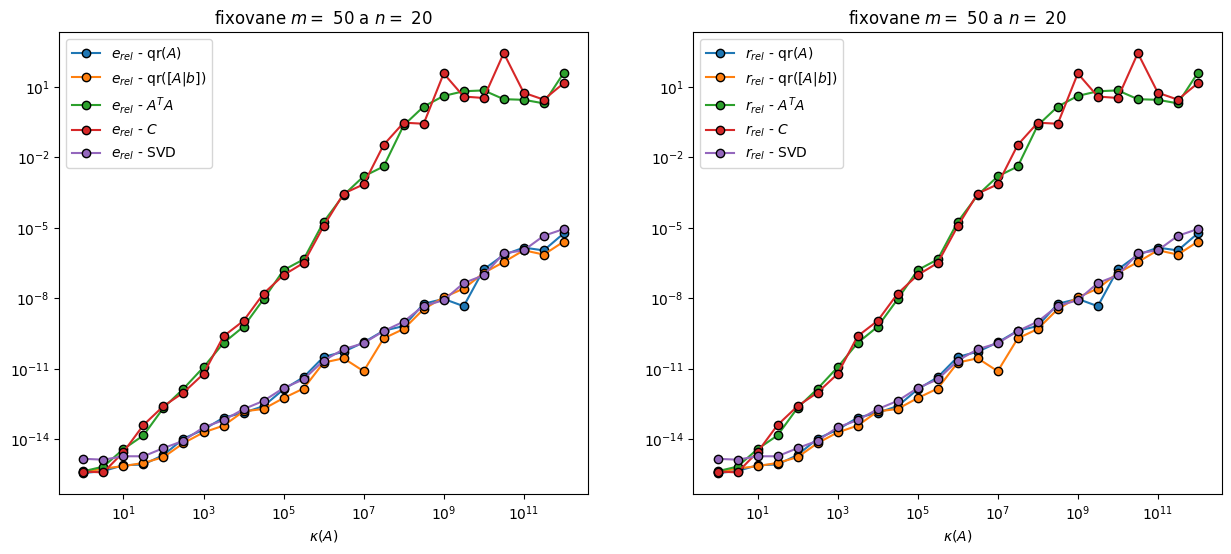

In [ ]:
def RandomMatice(m,n, cond):
    """ Vrati nesingularni ctvercovou matici A rozmeru "m"-krat-"n" s cislem podminenosti kappa(A) = "cond". """
    GenerNahodCisel = np.random.default_rng(123456789123456789) ### tenhle radek zajistuje, ze ty nahodnz cisla jsou vygenerovanz pri kazdem behu stejne (lze smazat)
    A = GenerNahodCisel.standard_normal(size=(m,n))
    U, _, Vt = np.linalg.svd(A)
    singvals = np.logspace(0, -np.log10(cond), np.min([m,n]))
    S = np.zeros_like(A); np.fill_diagonal(S, singvals)
    return U @ S @ Vt
######################################################################################

### inicializace
m = ; n = ; CondNmb_totry =
e_rel_qrA = np.zeros(len(CondNmb_totry)); r_rel_qrA = np.zeros(len(CondNmb_totry))
e_rel_qrAb = np.zeros(len(CondNmb_totry)); r_rel_qrAb = np.zeros(len(CondNmb_totry))
e_rel_AtA = np.zeros(len(CondNmb_totry)); r_rel_AtA = np.zeros(len(CondNmb_totry))
e_rel_C = np.zeros(len(CondNmb_totry)); r_rel_C = np.zeros(len(CondNmb_totry))
e_rel_SVD = np.zeros(len(CondNmb_totry)); r_rel_SVD = np.zeros(len(CondNmb_totry))


for ind in range(...):
  A =
  x_exact =
  b =

  e_rel_qrA[ind] =
  r_rel_qrA[ind] =

  e_rel_qrAb[ind] =
  r_rel_qrAb[ind] =

  e_rel_AtA[ind] =
  r_rel_AtA[ind] =

  e_rel_C[ind] =
  r_rel_C[ind] =

  e_rel_SVD[ind] =
  r_rel_SVD[ind] =


############################## Vykreslovani
plt.figure(figsize=(15,6))
plt.subplot(1,2,1); plt.title(r'fixovane $m =$ {} a $n =$ {}'.format(m,n))
plt.loglog(CondNmb_totry,e_rel_qrA, marker='o', markeredgecolor='k', label='$e_{rel}$ - qr($A$)')
plt.loglog(CondNmb_totry,e_rel_qrAb, marker='o', markeredgecolor='k', label='$e_{rel}$ - qr($[A|b]$)')
plt.loglog(CondNmb_totry,e_rel_AtA, marker='o', markeredgecolor='k', label='$e_{rel}$ - $A^T A$')
plt.loglog(CondNmb_totry,e_rel_C, marker='o', markeredgecolor='k', label=r'$e_{rel}$ - $C$')
plt.loglog(CondNmb_totry,e_rel_SVD, marker='o', markeredgecolor='k', label=r'$e_{rel}$ - SVD')
plt.xlabel(r'$\kappa(A)$'); plt.legend(); # plt.xticks(np.logspace(0,20,30)); plt.xtick_labels(np.logspace(0,20,30));

plt.subplot(1,2,2); plt.title(r'fixovane $m =$ {} a $n =$ {}'.format(m,n))
plt.loglog(CondNmb_totry,e_rel_qrA, marker='o', markeredgecolor='k', label='$r_{rel}$ - qr($A$)')
plt.loglog(CondNmb_totry,e_rel_qrAb, marker='o', markeredgecolor='k', label='$r_{rel}$ - qr($[A|b]$)')
plt.loglog(CondNmb_totry,e_rel_AtA, marker='o', markeredgecolor='k', label='$r_{rel}$ - $A^T A$')
plt.loglog(CondNmb_totry,e_rel_C, marker='o', markeredgecolor='k', label=r'$r_{rel}$ - $C$')
plt.loglog(CondNmb_totry,e_rel_SVD, marker='o', markeredgecolor='k', label=r'$r_{rel}$ - SVD')
plt.xlabel(r'$\kappa(A)$'); plt.legend();
############################## Vykreslovani

### ZÚ - Výpočetní náročnost

Pro pro měření času programu použijeme funkci [`%timeit -o -qq`](https://docs.python.org/3/library/timeit.html) :

  ```
  # nasledujici kod zmeri cas potrebny na exekuci funkce "MojeFunkce()"
  TimeResult = %timeit -o -qq MojeFunkce_output = MojeFunkce(MojeFunkce_input)
  print('Prumerny cas na exekuci "MojeFunkce()" je', TimeResult.average)
  print('Smerodatna odchylka exekuce "MojeFunkce()" je', TimeResult.stdev)

  # Funkce "%timeit" mnohokrat spusti zbytek radku po prikazu "%timeit" a udela jednoduchou statistiku casu.
  # Meren je cas celeho zbyleho radku, tj. vseho za prikazem "%timeit".
  # Obecne funkce "%timeit" vraci objekt (tj. nikoliv pouze cas).
  # V tomto objektu je property "average" - tj. "TimeResult.average" udava prumerny cas na exekuci.
  # prikaz "-o" zajistuje, ze funkce "%timeit" da vystup
  # prikaz "-qq" zajistuje, ze funkce "%timeit" nebude nic vypisovat
  ```

---
 **Kódění** : Otestujte časovou náročnost numerických metod výše (5 metod) pro náhodné matice s "rostoucí velikostí".
  - náhodnou matici `A` dimenze `m`-krat-`n` lze vygenerovat příkazem `A =  GenerNahodCisel.standard_normal(size=(m,n))`,

  - pokud jde o velikost $A$, zkusíme 2 módy:
    - *Mód 1* : Zafixujeme $m$ a postupně zvyšujeme $n$;
    - *Mód 2* : Zafixujeme poměr $m:n$ a postupně zvyšujeme $m$.

  - obrázky níže jsou vygenerovány se settingem
    - *Mód 1* : `m=1000`,
    - *Mód 2* : `m=2*n`.

  - pro sestavování matic a vektorů "po blocích" se hodí [`np.block()`](https://numpy.org/doc/stable/reference/generated/numpy.block.html),
  - pro řešení soustav lineárních algebraických rovnic se čtvercovou maticí použijte [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).
  - pro výpočet $QR$-faktorizace použijeme vestavěnou funkci [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html). Ta umožňuje i output pouze matice $R$.


**Tužka a papír** :
  - za pomoci přednášky/googlení odhadněte asymptotickou výpočetní náročnost našich 5 metod (počet algebraických operací)
    - nejprve si rozmyslete nebo najděte-a-ocitujte kolik operací potřebujeme na standardní $QR$-faktorizaci matice $m$-krát-$n$,
    - pak si rozmyslete nebo najděte-a-ocitujte kolik operací potřebujeme na řešení čtvercové soustavy algebraických rovnic matice $n$-krát-$n$,
    - $\cdots $
  - jak odpovídá praxe našeho experimentu teorietickým odvozením?
  
  <details>
  <summary>Chci <font color="red"><b>hint</b></font></summary>
  
  Předpokládejme, že máme funkci $y = g(x)$, kterou budeme vykreslovat. Pokud vidíme, že v `loglog()` vykreslení je graf $g$ rostoucí přímka s kladnými hodnotami, pak tedy platí
  $$ \log (g(x)) = \alpha \log(x)  + \beta , $$
  pro nějaké $\alpha, \beta > 0$. Jak pak vypadá $g(x)$?
  
  </details>
  
  <details>
  <summary>Chci <font color="red"><b>hint/kontext</b></font></summary>
  
  V `numpy` je kód pro maticové násobení detailně zoptimalizován - neplýtvá se ani kouskem dostupné paměti nebo možnostmi procesoru, protože na maticovém násobení je postavená ohromná spousta dalších algoritmů.
  
  U funkce [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) už ta optimalizace není tak detailní.
  
  </details>
  
----



**Poznámka 1** : Tenhle kód byl při mých experimentech citlivý na ostatní aplikace na pozadí - vyplatí se vypnout další karty v prohlížeči či nepotřebné programy, pokud chceme replikovat obrázek níže.

**Poznámka 2** : Doporučuju vyzkoušet měnit hodnoty a poměry. S parametry napsanými výše kód poběží cca 10 minut, takže doporučuju si nastavit výrazně nižší hodnoty když debuggujete, např.:
  - `m=100` & `n_totry=np.array([10,50,100])`,
  - `PocetZvetseniVelikostiA = 3`.

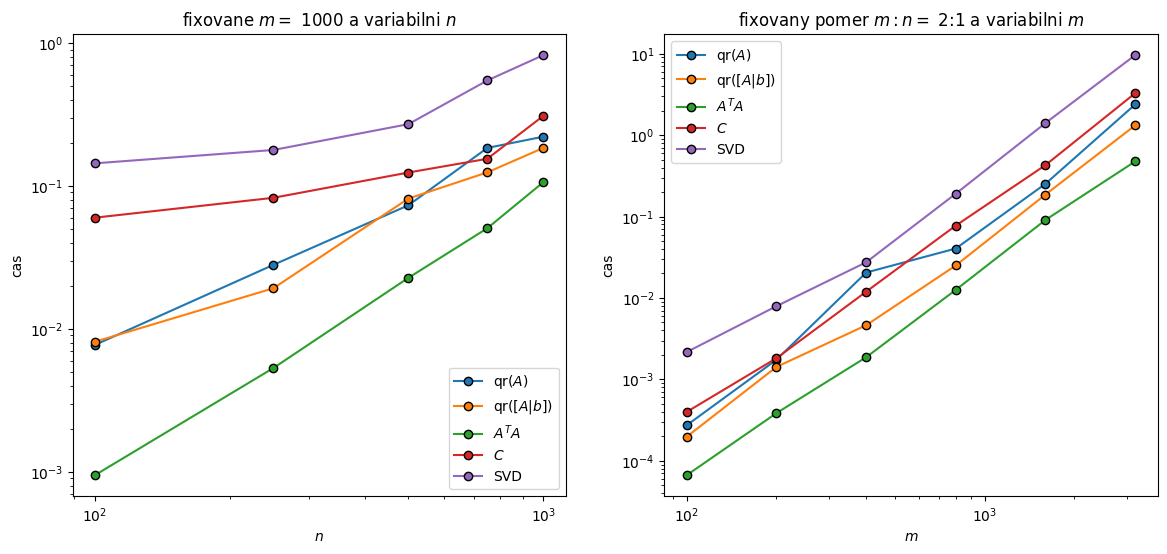

In [ ]:
########################################### Cast pro experiment s fixnim "m" a rostoucim "n" ###############################################################

### inicializace
m = ; b = np.random.randn(m) # 2-3mins pro m = 1000
n_totry = np.array([100,250,500,750,1000])

casy_qrA = np.zeros(len(n_totry)); casy_qrAb = np.zeros(len(n_totry))
casy_AtA = np.zeros(len(n_totry)); casy_C = np.zeros(len(n_totry)); casy_SVD = np.zeros(len(n_totry))

for ... :

  casy_qrA[ind] =
  casy_qrAb[ind] =
  casy_AtA[ind] =
  casy_C[ind] =
  casy_SVD[ind] =


############################## Vykreslovani
plt.figure(figsize=(14,6))
plt.subplot(1,2,1); plt.title(r'fixovane $m =$ {} a variabilni $n$'.format(m))
plt.loglog(n_totry,casy_qrA, marker='o', markeredgecolor='k', label='qr($A$)')
plt.loglog(n_totry,casy_qrAb, marker='o', markeredgecolor='k', label='qr($[A|b]$)')
plt.loglog(n_totry,casy_AtA, marker='o', markeredgecolor='k', label='$A^T A$')
plt.loglog(n_totry,casy_C, marker='o', markeredgecolor='k', label=r'$C$')
plt.loglog(n_totry,casy_SVD, marker='o', markeredgecolor='k', label=r'SVD')
plt.xlabel(r'$n$'); plt.ylabel(r'cas'); plt.legend();
############################## Vykreslovani



########################################### Cast pro experiment s fixnim pomerem "m:n" a rostoucim "m" ###############################################################
# inicializace
PocetZvetseniVelikostiA = # 4-5mins pro "8 zvetseni"
n_totry = (50*2.0**(np.arange(0,PocetZvetseniVelikostiA,1))).astype(np.int32);
NasobekNnaM = 2
casy_qrA = np.zeros(len(n_totry)); casy_qrAb = np.zeros(len(n_totry));
casy_AtA = np.zeros(len(n_totry)); casy_C = np.zeros(len(n_totry)); casy_SVD = np.zeros(len(n_totry));


for ... :
  casy_qrA[ind] =
  casy_qrAb[ind] =
  casy_AtA[ind] =
  casy_C[ind] =
  casy_SVD[ind] =


############################## Vykreslovani
plt.subplot(1,2,2); plt.title(r'fixovany pomer $m:n =$ {}:1 a variabilni $m$'.format(NasobekNnaM))
plt.loglog(NasobekNnaM*n_totry,casy_qrA, marker='o', markeredgecolor='k', label='qr($A$)')
plt.loglog(NasobekNnaM*n_totry,casy_qrAb, marker='o', markeredgecolor='k', label='qr($[A|b]$)')
plt.loglog(NasobekNnaM*n_totry,casy_AtA, marker='o', markeredgecolor='k', label='$A^T A$')
plt.loglog(NasobekNnaM*n_totry,casy_C, marker='o', markeredgecolor='k', label=r'$C$')
plt.loglog(NasobekNnaM*n_totry,casy_SVD, marker='o', markeredgecolor='k', label=r'SVD')
plt.xlabel(r'$m$'); plt.ylabel(r'cas'); plt.legend(); plt.show()
############################## Vykreslovani

## Část C: Lineární nejmenší čtverce v praxi

Vyzkoušíme si pár aplikací vedoucích na lineárních problém nejmenších čtverců.

### Úloha C1 - Na které elipse jsem?

Podobně jako Gauss budeme hledat elipsu na základě (nepřesně) naměřených bodů, které na dané elipse leží. Gauss měl práci s heldáním "té právé elipsy" ztíženou faktem, že tu elipsu musel hledat v $\mathbb{R}^{3}$ - my si uděláme život snazší. Body i elipsu budeme uvažovat rovnou v $\mathbb{R}^{2}$.

Jedním ze způsobů jak zadat elipsu v rovině je jako implicitní funkci, konkrétně jako body $(x,y)$ splňující

$$ ax^2 + bx + cxy + dy + ey^2 = 1, \qquad (\star)$$

pro dané koeficienty $a,b,c,d,e\in \mathbb{R}$ (koeficient $e$ v tomto značení "nemá nic společného" s excentricitou elipsy). Pro daný set bodů $(x_i,y_i)_{i=1,\dotsc, m}$ můžeme hledat elipsu, která nejlépe odpovídá těmto bodům, tj. koeficienty $a_{fit}, b_{fit},c_{fit}, d_{fit}, e_{fit}$, pro které je $(\star)$ "splněno nejlépe, co to jde" (opět doporučujeme přečíst si ten článek [200 let metody nejmenších čtverců](https://eudml.org/doc/196517), který ty uvozovky vysvětluje/motivuje detailně).

---
- **Tužka a papír**: Zformulujte matematickou úlohu pro nalezení nejlepších $a_{fit}, b_{fit},c_{fit}, d_{fit}, e_{fit}$ ve smyslu nejmenších čtverců, tj. jako problém $A\mathbf{x} = \mathbf{b}$ pro konkrétní $A$ a $\mathbf{b}$ dané body $(x_i,y_i)_{i=1,\dotsc, m}$.
  <details>
  <summary>Chci <font color="red"><b>hint 1</b></font></summary>
  Postupů je mnoho, ale podle mě ten nejpřirozenější povede na $\mathbf{b} = [1,\dotsc ,1]^T$.
  </details>
  <details>
  <summary>Chci <font color="red"><b>hint 2</b></font></summary>
  Pro libovolný skalár $x_0$ platí následující šíkovné rozepsání $\alpha x_0^2 + \beta x_0 + \gamma = [x_0^2 \; x_0 \; 1] \begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix} $. Zkuste si obdobně rozepsat $(\star)$.
  </details>

- **Kódění**: Pro elipsu $E$ danou koeficienty `PresneKoeficienty` nám kód níže vygeneruje $x$-ové a $y$*-ové souřadnice `x_presne, y_presne` bodů ležících na $E$ a také $x$-ové a $y$*-ové souřadnice `x_pozorovane, y_pozorovane` bodů, "které jsme pozorovali a jsou tedy nepřesné - zatížené chybou měření".

    - Sestavte a vyřešte problém $A \mathbf{x} = \mathbf{b}$, který odpovídá nalezení nejlépe fitující elipsy na základě "pozorovaných bodů" `x_pozorovane, y_pozorovane`.
    - pro sestavování matice po blocích (nebo po sloupcích/řádcích) se hodí funkce [`np.block()`](https://numpy.org/doc/stable/reference/generated/numpy.block.html),

    - řešení uložte do vektoru `FitKoeficienty = [a_fit, b_fit,c_fit,d_fit,e_fit]` pro hladký průběh následného vykreslování.

----

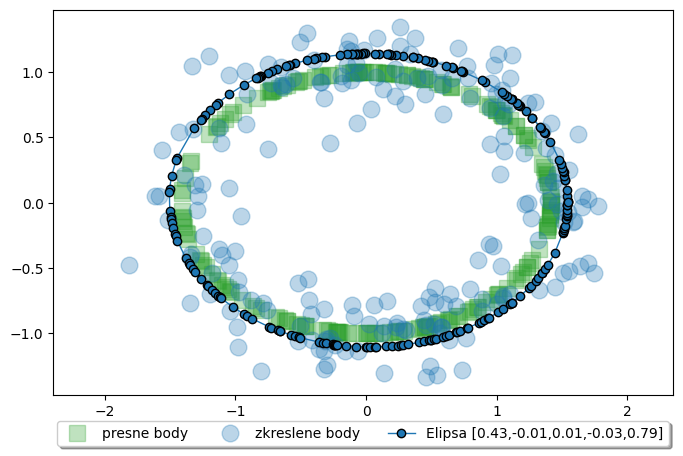

In [ ]:
def VygenerujPresneBodyNaElipse(koeficienty, PocetBodu, Vykresli=False):
  """Vygeneruje "PocetBodu" bodu na elipse dane rovnici ax^2 + bx + cxy + dy + ey^2 = 1, kde [a,b,c,d,e] = koeficienty. Pokud "Vykresli=True", elipsu i vykreslime."""
  [a,b,c,d,e] = koeficienty
  GenerNahodCisel = np.random.default_rng(12345678912345678) ### tenhle radek zajistuje, ze ty nahodny cisla jsou vygenerovanz pri kazdem behu stejne (lze smazat)
  theta_linspace = GenerNahodCisel.random(size=PocetBodu)
  theta = np.sort(2*np.pi*theta_linspace); cos_t, sin_t = np.cos(theta), np.sin(theta)
  A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2); B = b*cos_t + d*sin_t
  r = (-B + np.sqrt(B**2 + 4*A)) / (2*A)
  xi = r*cos_t; yi =  r*sin_t
  if Vykresli:
    plt.plot(np.append(xi,xi[0]),np.append(yi,yi[0]), marker='o', color='tab:blue', markeredgecolor='k', lw=1, label='Elipsa [{:.2f},{:.2f},{:.2f},{:.2f},{:.2f}]'.format(a,b,c,d,e))
    plt.gca().set_aspect("equal", "datalim")
  return xi,yi
######################################################################################

### Vygenerujeme si "presne" i "pozorivane" body na nejake konkkretni elipse
PocetBodu = 200;
PresneKoeficienty = [1/2,0,0,0,1]; VelikostZkresleni = 1e-1*2
x_presne, y_presne = VygenerujPresneBodyNaElipse(PresneKoeficienty, PocetBodu)
x_errs = GenerNahodCiselaux1.standard_normal(size=PocetBodu) * VelikostZkresleni;
y_errs = GenerNahodCiselaux2.standard_normal(size=PocetBodu) * VelikostZkresleni
x_pozorovane = x_presne + x_errs; y_pozorovane = y_presne + y_errs

### Sestavime a vyresime linearni problem nejmensich ctvercu
A =
b =
FitKoeficienty =


############################## Vykreslovani
plt.figure(figsize=(8,5))
plt.plot(x_presne, y_presne, 's', color='tab:green', ms=12, alpha=.3, label='presne body')
plt.plot(x_pozorovane, y_pozorovane, 'o', color='tab:blue', ms=12, alpha=.3, label='zkreslene body')
_,_ = VygenerujPresneBodyNaElipse(FitKoeficienty,PocetBodu, Vykresli=True)
plt.axis('equal'); plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=3); plt.show()
############################## Vykreslovani

### Úloha C2: [Okun's law](https://en.wikipedia.org/wiki/Okun%27s_law)



V markoekonomii existuje empirické pravidlo (aka vypozorovaná heuristika), tzv. Okun's law, které tvrdí, že růst HDP by měl být přímo úměrný poklesu nezaměstnanosti. Koeficienty této lineární závislosti se přirozeně můžou lišit v různých ekonomikách.

V praxi máme (odhadovaná) data o míře nezaměstnanosti a velikosti HDP, jeden kvartál za druhým. Pro ekonomiku USA v letech 1959-2015 jsou tato data dostupná, např. [zde, data.xls (sloupce 2 a 3)](https://www.rba.gov.au/publications/rdp/2015/2015-14-data.html). Njeprve si tedy data stáhneme.



In [ ]:
# URL naseho word-office souboru .xls
xls_url = "https://www.rba.gov.au/publications/rdp/2015/2015-14/additional-files/data.xls"
# Nazev pod kterym chceme soubor ulozit
local_filename = "data.xls"

print(f"Downloading {xls_url} to {local_filename} pomoci knihovny requests...")
response = requests.get(xls_url); response.raise_for_status()
with open(local_filename, 'wb') as f:
    f.write(response.content)
print("Download hotov!")

Download hotov!


Z popisu vyse tedy mame stazena data odpovidajici dvěma vektorům:
  - $\tilde{\mathbf{u}}$, který v sobě má data o míře nezaměstnanosti v USA v chronologickém pořadí (tj. $\tilde{u}_1$ je míra nezaměstnanosti v prvním čtvrtletí 1959, $\tilde{u}_2$ je míra nezaměstnanosti v druhém čtvrtletí 1959, atd.).
  - $\tilde{\mathbf{g}}$, který v sobě má data o velikosti HDP v USA v chronologickém pořadí (tj. $\tilde{g}_1$ je HDP v prvním čtvrtletí 1959, $\tilde{g}_2$ je HDP v druhém čtvrtletí 1959, atd.).



In [ ]:
df = pd.read_excel('data.xls', engine='xlrd')  # Predpokladam, ze slozka 'data.xls' je nahrana do tohoto googlecolabu, kdyztak si ji donahrajte (skrze ikonku slozky na liste uplne vpravo)
u_tild = df.values[:,1].astype(float)
g_tild = df.values[:,2].astype(float)

Hodnoty figurující v "Okun's law", tj. **procentuální změna HDP** a **změna míry nezaměstnanosti** si musíme sestrojit:
- $\mathbf{u} = [u_1, \dotsc, u_{m-1}], \quad \mathrm{kde} \; u_i = \tilde{u}_{i+1} - \tilde{u}_{i}$,
- $\mathbf{g} = [g_1, \dotsc, g_{m-1}], \quad \mathrm{kde} \; g_i = 100\cdot \tfrac{\tilde{g}_{i+1} - \tilde{g}_{i}}{\tilde{g}_{i}}$ (koeficient `100` změní 0.75 na 75%).

Nadto jsou data ve vektorech $\mathbf{u},\mathbf{g}$ seřazena chronologicky, zatímco vykreslování vztahu "$\mathbf{g}$ j funkce $\mathbf{u}$" s časem nesouvisí - chtěli bychom mít prvky $\mathbf{u}$ seřazeny podle velikosti.

Tohle všechno nám ošetří funkce `DataPreprocess()` níže, která nám vrátí vektory $\mathbf{u}, \mathbf{g}$ odpovídající správně zprocesovaným datům.

---
- **Tužka a papír**:
  - Matematicky formulujte lineární problém nejmenších čtverců pro nalezení koeficientů úměrnosti $\theta_0,\theta_1$, které udávají lineární závislost prvků $\mathbf{g}$ na $\mathbf{u}$, tj. které nejlépe odpovídají
  $$ \mathbf{g}_i \approx \theta_0 + \theta_1 \cdot \mathbf{u}_i \quad i = 1,2,\dotsc , m,  $$
  ve smyslu nejmenších čtverců, kde $m$ je počet dat (tj. párů $\mathbf{u}_i,\mathbf{g}_i$).
  - **Poznámka** : Tomuto problému se také říká [***lineární regrese***](https://en.wikipedia.org/wiki/Linear_regression).

- **Kódění**:
  - Vypočítejte parametry $\theta_0,\theta_1$ na základě odvozeného problému výše s pomocí jedné z našich metod,
  - ouput by měl byt v poli `thetas`, tj. `thetas = [theta_0,theta_1]`.


----

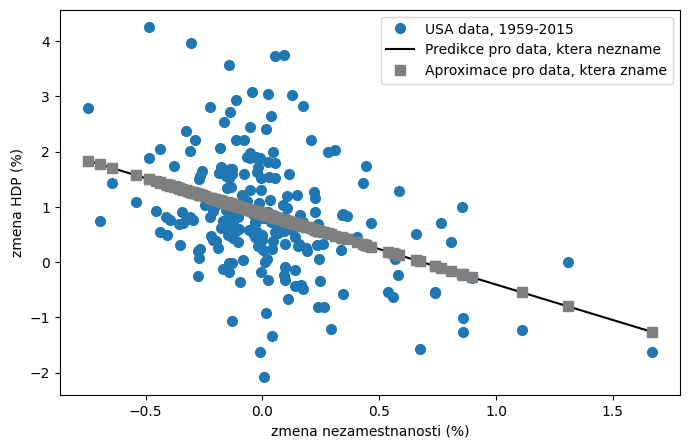

In [ ]:
def DataPreprocess(u_tild,g_tild):
  ''' Odpovida data-preprocessing z namerenych dat na data, se kterymi chceme pracvat.'''
  u = (u_tild[1:]-u_tild[:-1])
  g = 100*( (g_tild[1:]-g_tild[:-1])/g_tild[1:] )
  permutace_u = np.argsort(u); u = u[permutace_u]; g = g[permutace_u]
  return u,g
######################################################################################

### data preprocessing
u,g = DataPreprocess(u_tild,g_tild)

### sestaveni a reseni linearnich nejmensich ctvercu
A =
b =
thetas =

############################## Vykreslovani
plt.figure(figsize=(8,5))
plt.plot(u, g, 'o', ms=7, label='USA data, 1959-2015')
plt.plot(u, thetas[0] + thetas[1]*u, 'k-', label='Predikce pro data, ktera nezname')
plt.plot(u, thetas[0] + thetas[1]*u, marker='s', ms=7, lw=0, color="tab:gray", label='Aproximace pro data, ktera zname')
plt.xlabel(r'zmena nezamestnanosti (%)'); plt.ylabel(r'zmena HDP (%)'); plt.legend(); plt.show()
############################## Vykreslovani

### ZÚ - zvládneme to lépe než pan Okun?

V úloze C2 jsme našli $\theta_0,\theta_1$, které nejlépe vysvětlují naše data $(\mathbf{u},\mathbf{g})$ ve smyslu

$$ g_i \approx \theta_0 + \theta_1 u_i, $$

tedy nejlepší lineární model pro pozorovaná data. Pro lineární model jsme se rozhodli "***zdánlivě náhodou*** - pan Okun nám to poradil". Jak by dopadly modely vyžívající polynomy vyššího stupně?

---
- **Tužka a papír**: Pro daný stupeň polynomu $d$ odvoďte matici $A$ a pravou stranu $\mathbf{b}$, které odpovídají modelu

  $$ g_i \approx \theta_0 + \theta_1 u_i + \dotsc  + \theta_d u_i^d =: p_{\mathbf{\theta}}(u_i), \quad i=1,\dotsc ,m $$

  ve smyslu nejmenších čtverců, kde $m$ je počet dat (tj. párů $\mathbf{u}_i,\mathbf{g}_i$) a $p_{\mathbf{\theta}}$ je hledaný polynom stupně nejvýše $d$ s koeficienty $\mathbf{\theta} = [\theta_0, \dotsc , \theta_d]$.
  - **Poznámka** : Tomuto problému se říká [***polynomiální regrese***](https://en.wikipedia.org/wiki/Polynomial_regression).

  
- **Kódění**:

  - Vypočítejte $\mathbf{\theta} = [\theta_0, \dotsc , \theta_d]$ ve smyslu nejmenších čtverců jednou z metod výše pro různá $d$
    - možná se bude hodit funkce [`np.vander()`](https://numpy.org/doc/2.2/reference/generated/numpy.vander.html)
  
  - na základě výsledků sestrojte polynomy $p_{\mathbf{\theta}}$ pomocí [`numpy.polynomial.polynomial.Polynomial()`](https://numpy.org/doc/2.2/reference/generated/numpy.polynomial.polynomial.Polynomial.html#numpy.polynomial.polynomial.Polynomial).

  - pomocí polynomů $p_{\mathbf{\theta}}$ můžeme (stejně jako v C2) buď
    - koukat na chybu aproximace v bodech, kde máme naměřená data (tj. právě v $\mathbf{u}_i$)
    - zkoušet predikovat změnu HDP pro "nové" hodnoty $v$, tj. $v \neq \mathbf{u}_i  \forall i$

  - Skript níže nám toto umožňuje pro tři různé hodnoty $d$ souběžně, ale není obtížné upravit vykreslování i pro více hodnot $d$ najednou.
    
  - Porovnejte různé volby modelů, tj. různá $d$. Porovnejte "kvalitu" aproximace a predikce. Doporučili byste na základě vašich výsledků na tomto data-setu "updated verzi Okun's law" nebo ne? Proč?
----

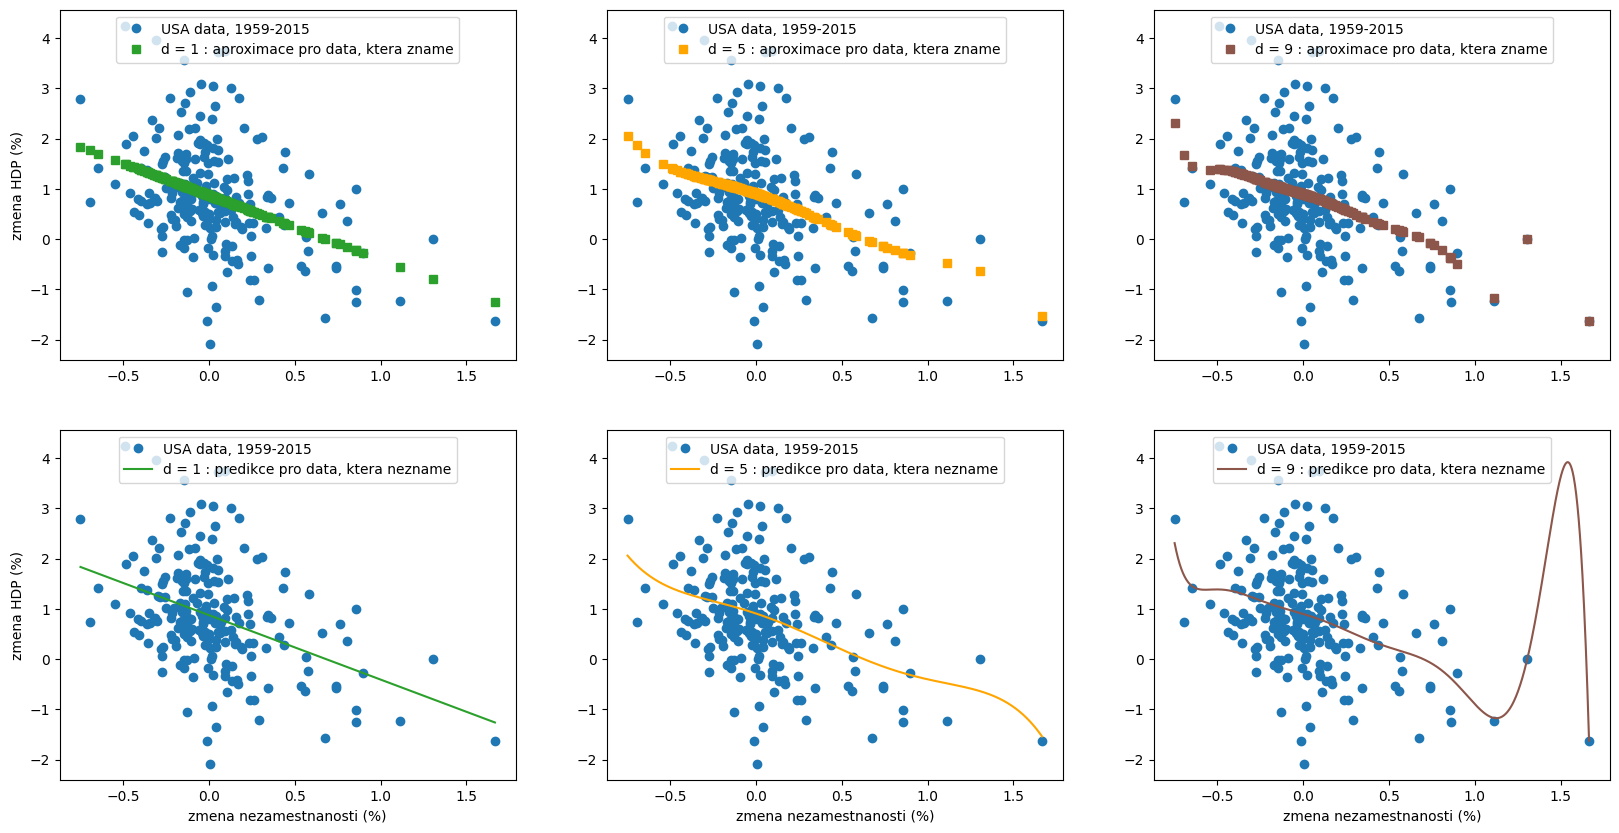

In [ ]:
def DataPreprocess(u_tild,g_tild):
  ''' Odpovida data-preprocessing z namerenych dat na data, se kterymi chceme pracovat.'''
  u = (u_tild[1:]-u_tild[:-1])
  g = 100*( (g_tild[1:]-g_tild[:-1])/g_tild[1:] )
  permutace_u = np.argsort(u); u = u[permutace_u]; g = g[permutace_u]
  return u,g
######################################################################################

### data preprocessing
u,g = DataPreprocess(u_tild,g_tild)

### nejmensi ctverce pro polynomy vyssich stupnu
PolDeg_totry = ...
v_body = np.linspace(np.min(u), np.max(u), ...)

# inicializace, abychom meli kam ukladat vysledky "g_aproximace := p_theta(u)" a "g_predikce := p_theta(v_body)"
g_aproximace = np.zeros((len(PolDeg_totry),len(u)))
g_predikce = np.zeros((len(PolDeg_totry),len(v_body)))

# for cyklus pro jednotlive stupne polynomu
for ind_PolDeg in ... :

  g_aproximace[ind_PolDeg,:] =
  g_predikce[ind_PolDeg,:] =


############################## Vykreslovani
plt.figure(figsize=(20,10))
plt.subplot(2,3,1); plt.plot(u, g, 'o', label='USA data, 1959-2015'); plt.plot(u, g_aproximace[0,:], 's', lw=0, c="tab:green", label='d = {} : aproximace pro data, ktera zname'.format(PolDeg_totry[0]));
plt.legend(loc="upper center"); plt.ylabel(r'zmena HDP (%)');
plt.subplot(2,3,2); plt.plot(u, g, 'o', label='USA data, 1959-2015'); plt.plot(u, g_aproximace[1,:], 's', lw=0, c="orange", label='d = {} : aproximace pro data, ktera zname'.format(PolDeg_totry[1]));
plt.legend(loc="upper center");
plt.subplot(2,3,3); plt.plot(u, g, 'o', label='USA data, 1959-2015'); plt.plot(u, g_aproximace[2,:], 's', lw=0, c="tab:brown", label='d = {} : aproximace pro data, ktera zname'.format(PolDeg_totry[2]));
plt.legend(loc="upper center");

plt.subplot(2,3,4); plt.plot(u, g, 'o', label='USA data, 1959-2015'); plt.plot(v_body, g_predikce[0,:], '-', c="tab:green", label='d = {} : predikce pro data, ktera nezname'.format(PolDeg_totry[0]));
plt.legend(loc="upper center"); plt.xlabel(r'zmena nezamestnanosti (%)'); plt.ylabel(r'zmena HDP (%)');
plt.subplot(2,3,5); plt.plot(u, g, 'o', label='USA data, 1959-2015'); plt.plot(v_body, g_predikce[1,:], '-', c="orange", label='d = {} : predikce pro data, ktera nezname'.format(PolDeg_totry[1]));
plt.legend(loc="upper center"); plt.xlabel(r'zmena nezamestnanosti (%)');
plt.subplot(2,3,6); plt.plot(u, g, 'o', label='USA data, 1959-2015'); plt.plot(v_body, g_predikce[2,:], '-', c="tab:brown", label='d = {} : predikce pro data, ktera nezname'.format(PolDeg_totry[2]));
plt.legend(loc="upper center"); plt.xlabel(r'zmena nezamestnanosti (%)');
plt.show()
############################## Vykreslovani

## [Kvíz](https://forms.gle/unaaGX98VzTXjfmz9)